In [25]:
# Import packages and data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("synthetic_cancer_data.csv", engine='python')

In [26]:
df.head()

Patient_ID   Age  Sex  Smoking_Status  Family_History  TP53_Mutation  \
0           1  68.0  0.0             0.0             1.0            0.0   
1           2  58.0  0.0             0.0             0.0            0.0   
2           3  44.0  1.0             2.0             0.0            1.0   
3           4  72.0  1.0             2.0             0.0            1.0   
4           5  37.0  1.0             0.0             1.0            0.0   

   BRCA1_Mutation  KRAS_Mutation  Total_Mutations  CEA_Level  AFP_Level  \
0             1.0            0.0              3.0   6.104870   2.217815   
1             0.0            0.0              7.0  11.291050   6.718345   
2             1.0            0.0              7.0  13.036086   6.217639   
3             0.0            1.0              4.0   5.899866   4.636553   
4             0.0            0.0              3.0   3.647765  11.127882   

   WBC_Count  CRP_Level  Tumor_Size  Tumor_Location  Tumor_Density  \
0   5.456943   2.920242    5.094221             2.0      59.088868   
1  10.317588   3.142171    9.966969             2.0      15.604580   
2   9.269662   8.049956    8.139703             0.0      56.125238   
3   7.985566   5.437697    6.152194             1.0      82.576326   
4   8.442908   3.181946    3.062536             2.0      51.331589   

   Cancer_Status  
0              0  
1              1  
2              1  
3              1  
4              0

In [27]:
df.columns

Index(['Patient_ID', 'Age', 'Sex', 'Smoking_Status', 'Family_History',
       'TP53_Mutation', 'BRCA1_Mutation', 'KRAS_Mutation', 'Total_Mutations',
       'CEA_Level', 'AFP_Level', 'WBC_Count', 'CRP_Level', 'Tumor_Size',
       'Tumor_Location', 'Tumor_Density', 'Cancer_Status'],
      dtype='object')

In [28]:
df.info()
#Shows that many of the categorical data is coded as numeric data, i.e. smoking status or sex
# There is also an acceptable degree of missingness, with all columns having less than 30% missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient_ID       1000 non-null   int64  
 1   Age              959 non-null    float64
 2   Sex              961 non-null    float64
 3   Smoking_Status   964 non-null    float64
 4   Family_History   961 non-null    float64
 5   TP53_Mutation    957 non-null    float64
 6   BRCA1_Mutation   967 non-null    float64
 7   KRAS_Mutation    954 non-null    float64
 8   Total_Mutations  962 non-null    float64
 9   CEA_Level        955 non-null    float64
 10  AFP_Level        961 non-null    float64
 11  WBC_Count        963 non-null    float64
 12  CRP_Level        956 non-null    float64
 13  Tumor_Size       967 non-null    float64
 14  Tumor_Location   959 non-null    float64
 15  Tumor_Density    956 non-null    float64
 16  Cancer_Status    1000 non-null   int64  
dtypes: float64(15),

In [29]:
Subcolumns = ['Sex', 'Smoking_Status', 'Family_History',
       'TP53_Mutation', 'BRCA1_Mutation', 'KRAS_Mutation',
       'Tumor_Location','Cancer_Status']
df[Subcolumns] = df[Subcolumns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Patient_ID       1000 non-null   int64   
 1   Age              959 non-null    float64 
 2   Sex              961 non-null    category
 3   Smoking_Status   964 non-null    category
 4   Family_History   961 non-null    category
 5   TP53_Mutation    957 non-null    category
 6   BRCA1_Mutation   967 non-null    category
 7   KRAS_Mutation    954 non-null    category
 8   Total_Mutations  962 non-null    float64 
 9   CEA_Level        955 non-null    float64 
 10  AFP_Level        961 non-null    float64 
 11  WBC_Count        963 non-null    float64 
 12  CRP_Level        956 non-null    float64 
 13  Tumor_Size       967 non-null    float64 
 14  Tumor_Location   959 non-null    category
 15  Tumor_Density    956 non-null    float64 
 16  Cancer_Status    1000 non-null   category
d

In [30]:
df.describe()
# What is strange is that some measurements have negative values

Patient_ID         Age  Total_Mutations   CEA_Level   AFP_Level  \
count  1000.000000  959.000000       962.000000  955.000000  961.000000   
mean    500.500000   54.600475         4.224732   10.980162    7.888144   
std     288.819436   13.966423         2.956816    5.650584    4.299786   
min       1.000000    9.081122        -5.781466   -7.042644   -5.917186   
25%     250.750000   44.184147         2.000803    6.883041    4.739818   
50%     500.500000   54.861908         4.304960   11.344496    7.910704   
75%     750.250000   64.993496         6.336567   15.059082   10.997217   
max    1000.000000   96.794119        12.572837   28.545501   21.079736   

        WBC_Count   CRP_Level  Tumor_Size  Tumor_Density  
count  963.000000  956.000000  967.000000     956.000000  
mean     8.167887    5.006850    5.127923      56.352742  
std      2.335048    2.873147    2.955793      26.629045  
min      1.188595   -4.662313   -4.120722     -36.649780  
25%      6.451814    2.909371    3.103796      37.465370  
50%      8.155913    5.110889    5.081299      56.559563  
75%      9.888246    7.112156    7.181305      75.803074  
max     15.843519   12.514428   15.208909     138.355756

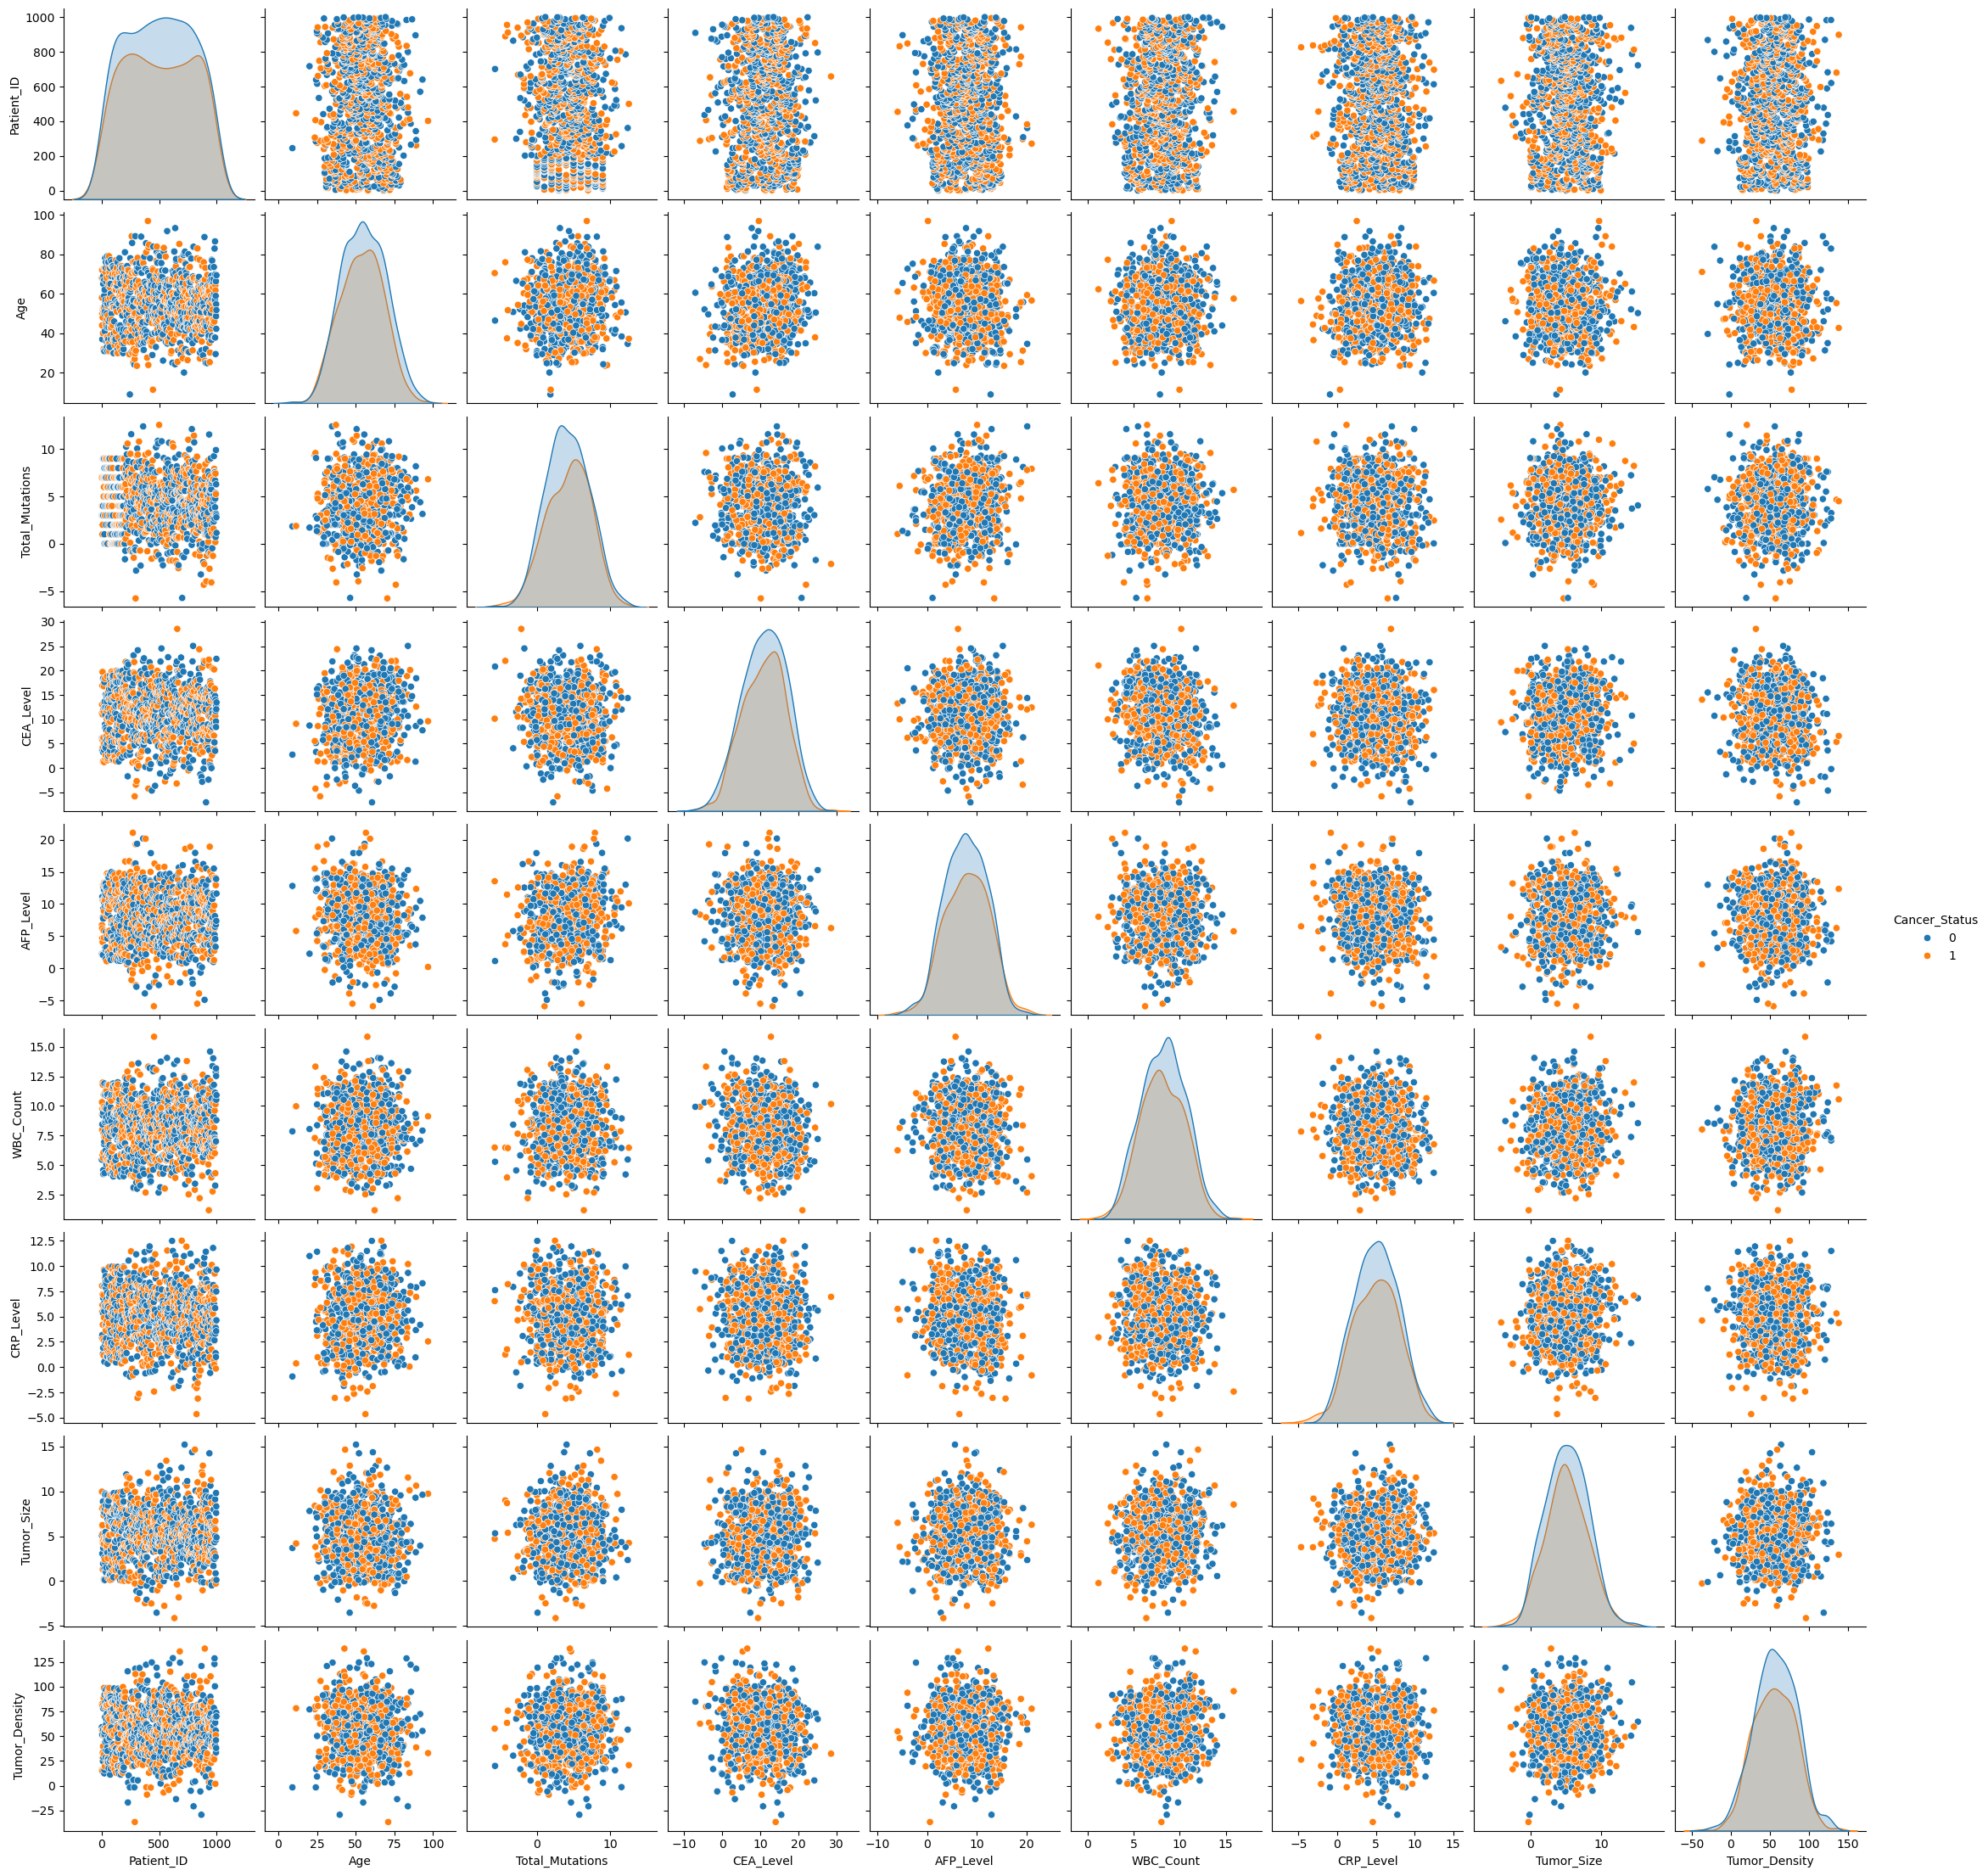

In [ ]:
sns.pairplot(df, hue='Cancer_Status')
# There are no clear patterns to be discriminated between healthy and cancer patients across the 1-on-1 numeric variables
# There appear to be some negative values that mau need to be coded as NA depending on whether they are possible or not. I.e. is it possible to have a negative number of total mutations? Unlikely.